<a href="https://colab.research.google.com/github/nusfeiwei/RPassignment/blob/main/BASIS_FUNCTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a program in python to implement the MLE that employs basis functions to solve the polynomial curve fitting problem. Follow the instructions below:
1. Generate 50 2D-data points using the following function: 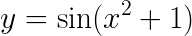
2. Add Gaussian random noise to the data
3. Fit the generated noisy data using the MLE that employs the Gaussian basis functions as discussed in class.
4. Show your results for different values of M that generate overfitting and underfitting curves.
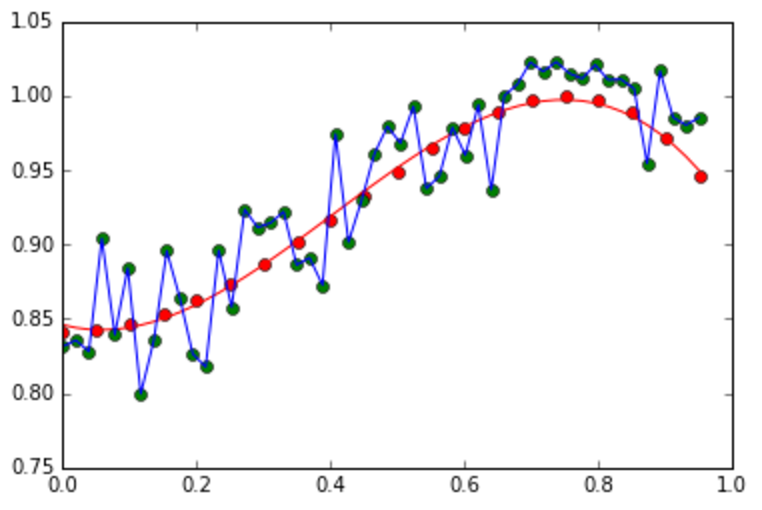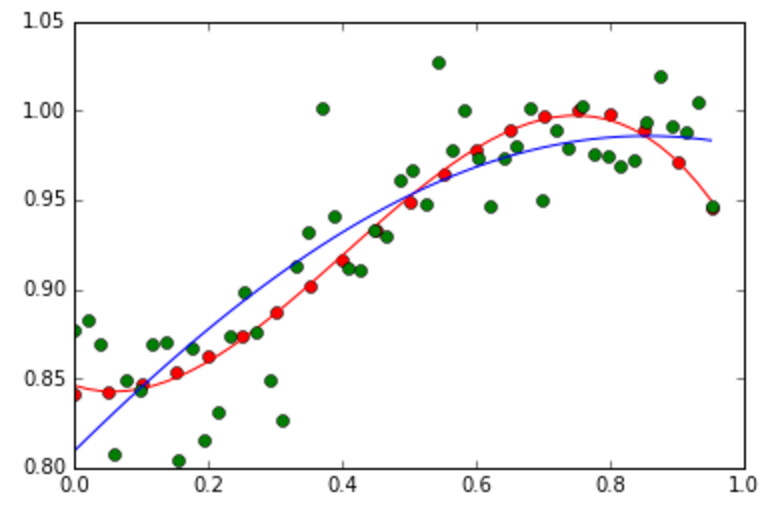
5. Change the basis functions to the sigmoid basis functions, and show the results for different values of M that generate overfitting and underfitting curves.
6. Change the original curve function to 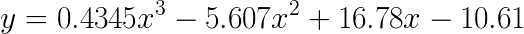, and use the sigmoid basis function to estimate the best curve fitting from the noisy data.
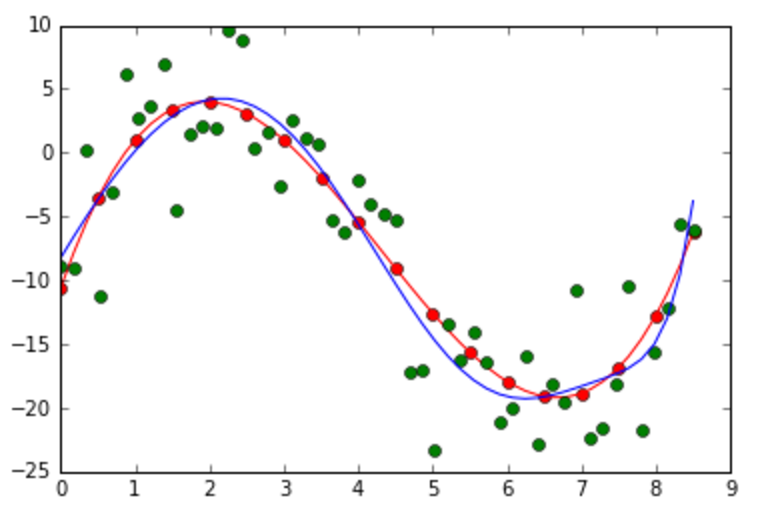
7. Experiment with different parameters of the Gaussian and sigmoid basis functions, and then show the plot. Also, discuss the advantages of these basis functions over polynomial functions.